# Get stock market data & clean data

In [1]:
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
# Names of intersted stocks
stock_names = {'BHP.AX',
               'FMG.AX',
               'ABBV',
               'PFE',
               'BAC',
               'COKE',
               'SQ',
               'AAPL',
               'AMD',
               'FDX',
               'EBAY',
               'AMZN',
               'C',
               'F',
               'GDX',
               'USO'}

In [3]:
# Get a list of all closing prices
stock_list = {}

for stock in stock_names:
    
    stock_list[stock] = qs.utils.download_returns(stock)

    

    
# Limit all close prices to the last 10 years 
close_all = []

for name in stock_names:
    
    close_new = stock_list[name].loc["2011-01-01" :]
    
    close_all.append(close_new)
    
    
    
    
# Convert close prices to dataframe
df = pd.DataFrame(close_all[:]).T
df.columns = stock_names

display(df)

,USO,F,BAC,PFE,AAPL,FDX,C,AMD,GDX,BHP.AX,EBAY,AMZN,FMG.AX,SQ,COKE,ABBV
Date,,,,,,,,,,,,,,,,
2011-01-03,0.001282,0.027397,0.063718,0.009709,0.021732,0.001935,0.035941,0.035452,-0.011388,NaN,0.030543,0.023444,NaN,NaN,0.024649,NaN
2011-01-04,-0.024840,0.007536,0.003524,0.017534,0.005219,-0.000751,0.000000,0.035419,-0.028797,0.009282,-0.007322,0.004288,-0.013761,NaN,-0.008955,NaN
2011-01-05,0.011555,0.029344,0.018258,0.006670,0.008180,0.008054,0.014285,0.015963,-0.013555,-0.014452,0.009133,0.013026,-0.007752,NaN,0.004607,NaN
2011-01-06,-0.021807,0.018446,-0.004138,0.003865,-0.000808,-0.008203,-0.004024,-0.024691,-0.025421,0.002888,-0.010790,-0.008324,0.032812,NaN,-0.011287,NaN
2011-01-07,-0.000265,0.002744,-0.013158,0.008801,0.007161,0.000537,-0.002020,0.016111,0.000000,-0.011520,-0.025334,-0.001991,-0.006051,NaN,-0.001070,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,-0.029931,-0.007893,0.004479,-0.001639,0.010157,-0.003775,0.005871,0.009161,-0.003553,-0.007387,0.007277,0.003827,0.011426,0.022149,0.010712,0.007547
2021-08-23,0.055722,0.012729,0.013376,0.024836,0.010257,0.001313,0.009110,0.039369,0.041167,0.002706,-0.002181,0.020600,-0.042731,0.028094,-0.002494,0.004545
2021-08-24,0.033152,0.027494,0.013933,-0.031043,-0.000601,0.003410,0.016222,-0.010297,-0.000311,0.010346,-0.004918,0.012220,0.013853,-0.000998,-0.006050,0.002681


In [4]:
# Drop NA
df = df.dropna()

<AxesSubplot:xlabel='Date'>

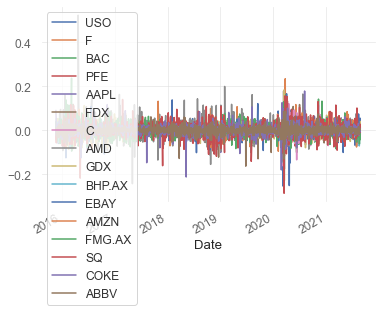

In [5]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

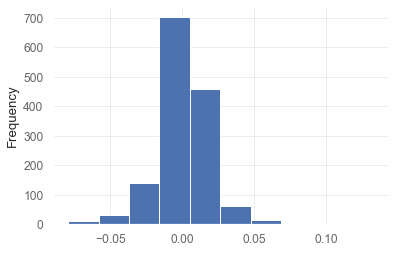

In [6]:
df["AMZN"].plot.hist()

In [7]:
# Get a list of all closing prices
sharpe_ratio = []
expected_return = []
sortino_ratio = []
volatility = []

for ticker in stock_names: 
    
    stk = qs.utils.download_returns(ticker)  
    
    # Get Sharpe Ratio
    sharpe = stk.sharpe()  
    sharpe_ratio.append(sharpe)
    
    # Expected return
    expt_rtrn = stk.expected_return()
    expected_return.append(expt_rtrn)
    
    # Sortino
    sortino = stk.sortino()
    sortino_ratio.append(sortino)
    
    # Volatility
    vol = stk.volatility()
    volatility.append(vol)
    
    

    

In [8]:
metrics_df = pd.DataFrame({"SharpeRatio": sharpe_ratio,
                           "ExpectedReturn": expected_return,
                           "SortinoRatio": sortino_ratio})

metrics_df.head(20)

,SharpeRatio,ExpectedReturn,SortinoRatio
0,-0.237043,-0.000628,-0.320462
1,0.397499,0.000311,0.594860
2,0.364576,0.000264,0.539878
3,0.547229,0.000448,0.802902
4,0.626335,0.000711,0.913839
5,0.562782,0.000529,0.838519
6,0.325599,0.000199,0.480435
7,0.441621,0.000339,0.654500
8,0.201982,-0.000017,0.293456
9,0.701000,0.000706,1.047848


# ARIMA 

In [9]:
# Import ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

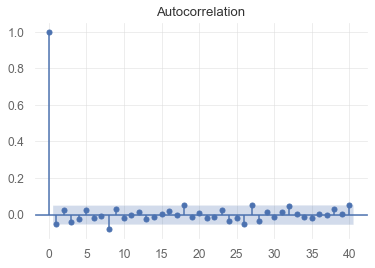

In [10]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.AMZN, lags=40);

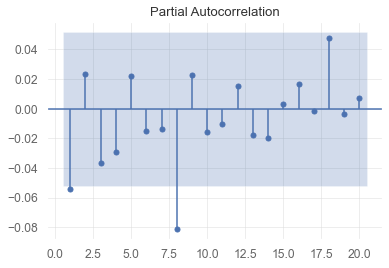

In [11]:
# Plot PACF
plot_pacf(df.AMZN, zero=False, lags=20);

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.AMZN)

(-39.77918247910233,
 0.0,
 0,
 1422,
 {'1%': -3.4349569928153607,
  '5%': -2.863574667579351,
  '10%': -2.5678532457009697},
 -7183.534342486491)

In [13]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Create the ARIMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags

model = ARIMA(df['AMZN'].values, order=(1,1,1))


In [14]:
# Fit the model to the data
result_ARMA = model.fit()

In [15]:
# Display model summary
result_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1422
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3650.104
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 26 Aug 2021   AIC                          -7292.208
Time:                        19:04:00   BIC                          -7271.168
Sample:                             1   HQIC                         -7284.349
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.717e-07   1.02e-05      0.027      0.979   -1.97e-05    2.02e-05
ar.L1.D.y     -0.0528      0.027     -1.925      0.054      -0.106       0.001
ma.L1.D.y     -0.9790      0.017    -58.847      0.000      -1.012      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -18.9516           +0.0000j           18.9516            0.5000
MA.1            1.0215           +0.0000j            1.0215            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
pd.DataFrame(results.forecast(steps=30)[0]).plot(title="30 Days Forecast")

NameError: name 'results' is not defined

# GARCH


In [ ]:
import arch as arch
from arch import arch_model

In [ ]:
#!pip install arch

In [ ]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.

model = arch_model(df['AMZN'], vol="GARCH", p=1, q=1)


In [ ]:
# Fit the GARCH Model
result_GARCH = model.fit(disp="off")

In [ ]:
# Output the model summary
result_GARCH.summary()

In [ ]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

In [ ]:
# Create a 30 day forecast 
forecast_horizon = 30
forecasts = result_GARCH.forecast(start=last_day, horizon=forecast_horizon)

In [ ]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

In [ ]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

In [ ]:
# Plot the final forecast
final.plot(title="30 Day Forecast for AMZN")